# EWBI, ETEPI, EDEPI


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Decomposition by country


In [2]:
df = pd.read_excel('data/2025-02-06_EWBI_computed.xlsx', 'Computation')

In [3]:
df = df.sort_values('EWBI', ascending=False)

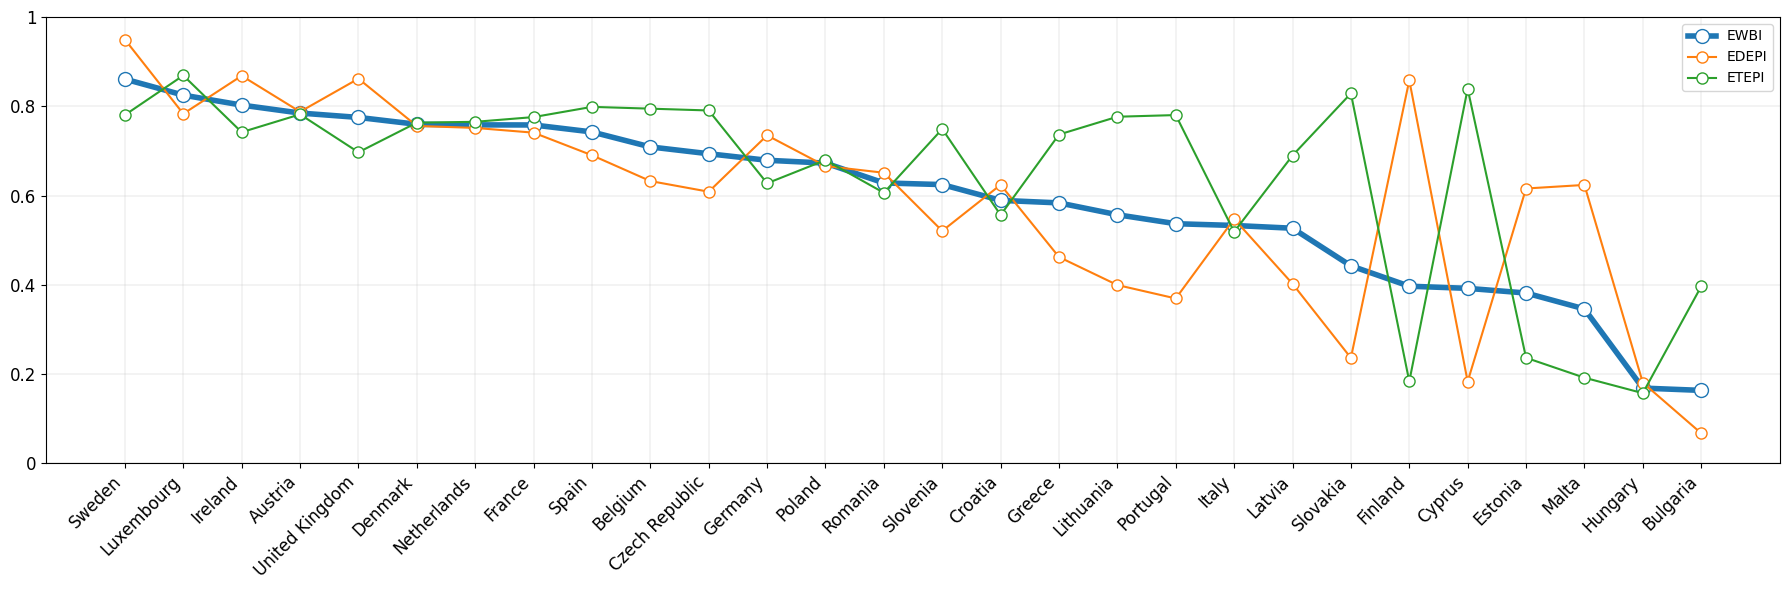

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
df.plot(x='Country', y='EWBI', ax=ax, linewidth=4, marker='o', markerfacecolor='white', markersize=10)
df.plot(x='Country', y='EDEPI', ax=ax, marker='o', markerfacecolor='white', markersize=8)
df.plot(x='Country', y='ETEPI', ax=ax,  marker='o', markerfacecolor='white', markersize=8)
ax.set_xticks(range(len(df)), labels=df.Country, rotation=45, ha='right', fontsize=12)
ylabels = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_yticks(ylabels, labels=ylabels, fontsize=12)
ax.grid(linewidth=0.2)
ax.set_xlabel("")
plt.tight_layout()
plt.show()
fig.savefig('indices.png')

In [170]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df['Country'],
        y=df['EWBI'],
        name='EWBI',
        mode='lines+markers',
        line=dict(width=4, color='#1f77b4'),
        marker=dict(
            size=10,
            color='white',
            line=dict(color='#1f77b4', width=2)
        ),
        hovertemplate='%{y:.3f}'
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Country'],
        y=df['EDEPI'],
        name='EDEPI',
        mode='lines+markers',
        line=dict(color='#ff7f0e'),
        marker=dict(
            size=8,
            color='white',
            line=dict(color='#ff7f0e', width=2)
        ),
        hovertemplate='%{y:.3f}'
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Country'],
        y=df['ETEPI'],
        name='ETEPI',
        mode='lines+markers',
        line=dict(color='#2ca02c'),
        marker=dict(
            size=8,
            color='white',
            line=dict(color='#2ca02c', width=2)
        ),
        hovertemplate='%{y:.3f}'
    )
)

fig.update_layout(
    title=dict(
        text='EWBI, EDEPI, and ETEPI by country in 2018',
        y=0.9,
        x=0.5,
        xanchor='center',
        yanchor='top',
        font=dict(size=20)
    ),
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=14)),
    yaxis=dict(
        range=[0, 1],
        tickformat='.1f',
        gridwidth=0.2,
    ),
    hovermode='closest',
    showlegend=True,
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
)

fig.update_layout(height=600)
fig.update_layout(hovermode='x unified')
fig.show()

fig.write_html('ewbi_subindices.html', include_plotlyjs=True, full_html=True)

## EWBI on a map


In [49]:
import json
import geopandas as gpd
import plotly.express as px

In [63]:
europe = gpd.read_file('data/ne_110m_admin_0_countries.zip')
europe = europe[europe.CONTINENT == 'Europe']

europe = europe.merge(df[['Country', 'EWBI']], how='left', 
                     left_on=['SOVEREIGNT'], right_on=['Country'])
europe = europe[~europe.EWBI.isna()]
europe_geojson = json.loads(europe.to_json())

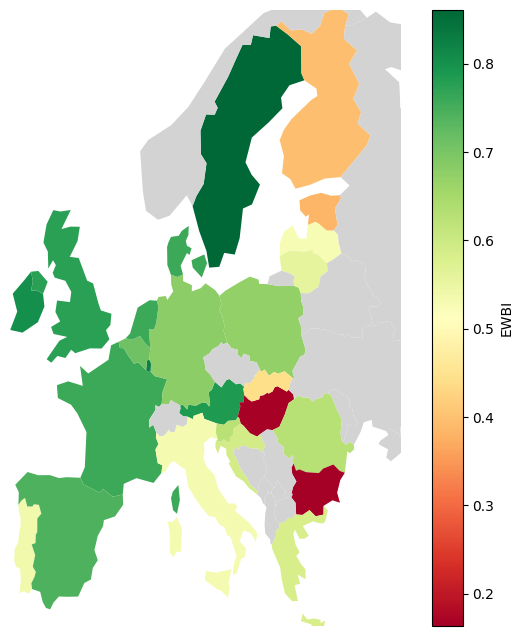

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

europe.plot(
    column="EWBI",
    ax=ax,
    legend=True,
    legend_kwds={"label": "EWBI"},
    missing_kwds={"color": "lightgrey"},
    cmap="RdYlGn",
)
ax.set_xlim([-10, 35])  # Longitude
ax.set_ylim([35, 70])  # Latitude


ax.axis("off")
plt.show()
fig.savefig('ewbi_map.png')

In [164]:
fig = px.choropleth(europe,
                    geojson=europe_geojson,
                    locations=europe.index,
                    color=europe.EWBI,
                    color_continuous_scale="RdYlGn",
                    custom_data=['Country']
                    )


fig.update_geos(
    visible=False,  # Hide base map features
    projection_type="mercator",
    lataxis_range=[35, 70],  # Latitude limits
    lonaxis_range=[-10, 35],  # Longitude limits
    resolution=110,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
)

fig.update_layout(
    title=dict(
        text='EWBI Index in Europe',
        x=0.5,
        y=0.98,
        xanchor='center',
        yanchor='top',
        font=dict(size=20)
    ),
    margin=dict(r=0, l=0, t=50, b=0),  # Adjust margins
    coloraxis_colorbar=dict(
        title="EWBI",
        tickformat=".2f",
        yanchor="middle",
        y=0.5,
        xanchor="right",
        x=0.95
    ),
    width=800,
    height=800,
)

fig.update_traces(
    hovertemplate="<b>%{customdata[0]}</b><br>" +
                  "EWBI: %{z:.2f}<br>"
)

fig.show()
fig.write_html('ewbi_map.html', include_plotlyjs=True, full_html=True)

## Time evolution

### Get all data in a single clean dataframe


In [45]:
doc = pd.read_excel('data/2025-02-06_EWBI_primary_data.xlsx', sheet_name='Explications')
sheets = doc.transpose().values[0]
print(sheets)
sheets = sheets[3:]
sheets

[nan 'Cet Excel contient les données de:' 'Sheet'
 'Dwellings energy expenditures' 'Home adequately warm' 'Comfortably cool'
 'Dwelling quality' 'Transport energy expenditures'
 'Public transport affordability' 'Public transport access']


array(['Dwellings energy expenditures', 'Home adequately warm',
       'Comfortably cool', 'Dwelling quality',
       'Transport energy expenditures', 'Public transport affordability',
       'Public transport access'], dtype=object)

In [46]:
data = {}
for sheet in sheets:
    data[sheet] = pd.read_excel('data/2025-02-06_EWBI_primary_data.xlsx', sheet_name=sheet, skiprows=1)

In [47]:
data[sheets[0]].head()

,Country,CountryCode,1988,1994,1999,2005,2010,2015,2018,Normalized value
0,Austria,AT,-,5.4,6.1,5.0,5.9,5.7,6.8,0.805825
1,Belgium,BE,9,5.7,5.6,6.1,8.6,7.4,8.5,0.723301
2,Bulgaria,BG,-,-,-,9.9,12.2,14.2,14.8,0.417476
3,Croatia,HR,-,-,-,9.7,10.7,12.3,10,0.650485
4,Cyprus,CY,-,-,-,4.3,4.6,4.6,4.3,0.927184


In [55]:
dfs = []

for key, df in data.items():
    copy = df.copy().drop(['CountryCode', 'Normalized value'], axis=1)
    copy['Indicator'] = key
    dfs.append(copy)

merged_df = pd.concat(dfs).set_index(['Country', 'Indicator']).sort_index()
merged_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
merged_df = merged_df.replace('-', np.nan)

/tmp/ipykernel_5930/3604875373.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.replace('-', np.nan)


In [56]:
merged_df.xs("Home adequately warm", level='Indicator').head()

,1988,1994,1999,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.8,9.0,8.6,7.7,8.3,7.7,8.0,8.7,9.5,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,16.2,20.9,18.7,18.4,18.3,14.8,16.2,20.0,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.4,80.2,83.3,68.9,70.0,69.7,66.0,66.8,61.9,59.5,NaN
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.9,22.5,23.9,24.0,24.3,23.7,21.7,20.3,NaN
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.1,37.8,40.1,46.3,50.6,51.0,47.5,49.2,49.0,46.8,NaN


In [57]:
merged_df.loc['France']

,1988,1994,1999,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator,,,,,,,,,,,,,,,,,,,
Comfortably cool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,NaN,NaN,NaN
Dwelling quality,NaN,NaN,NaN,NaN,22.3,20.6,19.6,22.3,22.6,22.8,20.9,19.6,22.1,22.4,24.7,23.9,25.4,19.3,NaN
Dwellings energy expenditures,6.2,5.2,5.5,NaN,NaN,5.9,NaN,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,5.7,NaN,NaN,6.1
Home adequately warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,15.0,15.3,16.9,15.2,17.7,15.0,16.3,14.0,14.9,NaN
Public transport access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN
Public transport affordability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN
Transport energy expenditures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,3.9


### Fill missing values

I thought of using cubic spline interpolation for smoother curves, but they would work only for indicators with > 3 values, i.e. 3/7.


In [73]:
filled_df = merged_df.ffill(axis=1).bfill(axis=1)
filled_df.loc['France']

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator,,,,,,,,,,,,,,,,,,,,,
Comfortably cool,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,...,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2
Dwelling quality,22.3,22.3,22.3,22.3,22.3,22.3,22.3,22.3,22.3,22.3,...,22.8,20.9,19.6,22.1,22.4,24.7,23.9,25.4,19.3,19.3
Dwellings energy expenditures,6.2,6.2,6.2,6.2,6.2,6.2,5.2,5.2,5.2,5.2,...,5.9,5.2,5.2,5.2,5.2,5.2,5.7,5.7,5.7,6.1
Home adequately warm,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,...,15.0,15.3,16.9,15.2,17.7,15.0,16.3,14.0,14.9,14.9
Public transport access,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8
Public transport affordability,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6
Transport energy expenditures,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.9


### Compute normalized values


In [ ]:
df = filled_df.unstack()
df.head()

1988                                                 \
Indicator Comfortably cool Dwelling quality Dwellings energy expenditures   
Country                                                                     
Austria               21.4             15.6                           5.4   
Belgium               19.0             19.7                           9.0   
Bulgaria              70.8             48.4                           9.9   
Croatia               34.4             30.2                           9.7   
Cyprus                34.3             44.0                           4.3   

                                                        \
Indicator Home adequately warm Public transport access   
Country                                                  
Austria                   10.0                     5.5   
Belgium                   17.0                     6.3   
Bulgaria                  81.4                     8.1   
Croatia                   18.9                    12.2   
Cyprus                    48.1                     3.5   

                                                                        \
Indicator Public transport affordability Transport energy expenditures   
Country                                                                  
Austria                              2.5                           3.6   
Belgium                              2.6                           1.9   
Bulgaria                            18.4                           1.7   
Croatia                              8.5                           4.8   
Cyprus                               0.4                           2.7   

                      1994                                                 \
Indicator Comfortably cool Dwelling quality Dwellings energy expenditures   
Country                                                                     
Austria               21.4             15.6                           5.4   
Belgium               19.0             19.7                           5.7   
Bulgaria              70.8             48.4                           9.9   
Croatia               34.4             30.2                           9.7   
Cyprus                34.3             44.0                           4.3   

           ...                    2017                                 \
Indicator  ... Public transport access Public transport affordability   
Country    ...                                                          
Austria    ...                     5.5                            2.5   
Belgium    ...                     6.3                            2.6   
Bulgaria   ...                     8.1                           18.4   
Croatia    ...                    12.2                            8.5   
Cyprus     ...                     3.5                            0.4   

                                                    2018                   \
Indicator Transport energy expenditures Comfortably cool Dwelling quality   
Country                                                                     
Austria                             3.6             21.4             17.2   
Belgium                             1.9             19.0             27.7   
Bulgaria                            1.7             70.8             25.1   
Croatia                             4.8             34.4             20.9   
Cyprus                              2.7             34.3             41.0   

                                                              \
Indicator Dwellings energy expenditures Home adequately warm   
Country                                                        
Austria                             6.8                  9.5   
Belgium                             8.5                 20.0   
Bulgaria                           14.8                 59.5   
Croatia                            10.0                 20.3   
Cyprus                              4.3                 46.8   

               

In [29]:
norm = 1 - (df - df.min()) / (df.max() - df.min())
norm = norm.replace(0, 0.01)

In [35]:
norm.loc[:, (2012, 'Comfortably cool')] # we check that this matches the Excel values

Country
Austria           0.739521
Belgium           0.775449
Bulgaria          0.010000
Croatia           0.544910
Cyprus            0.546407
Czech Republic    0.672156
Denmark           0.899701
Estonia           0.685629
Finland           0.624251
France            0.682635
Germany           0.754491
Greece            0.321856
Hungary           0.606287
Ireland           0.995509
Italy             0.507485
Latvia            0.585329
Lithuania         0.729042
Luxembourg        0.857784
Malta             0.443114
Netherlands       0.700599
Poland            0.648204
Portugal          0.443114
Romania           0.754491
Slovakia          0.718563
Slovenia          0.758982
Spain             0.510479
Sweden            0.911677
United Kingdom    1.000000
Name: (2012, Comfortably cool), dtype: float64

### Compute indices


In [37]:
indices = {
    'EDEPI': sheets[:4],
    'ETEPI': sheets[4:]
}
indices

{'EDEPI': array(['Dwellings energy expenditures', 'Home adequately warm',
        'Comfortably cool', 'Dwelling quality'], dtype=object),
 'ETEPI': array(['Transport energy expenditures', 'Public transport affordability',
        'Public transport access'], dtype=object)}

In [53]:
df = norm.swaplevel(axis=1)

In [64]:
# we compute the geometric mean as the exp of the mean of the logs
res = {}
for k, indicators in indices.items():
    s = None
    for i in indicators:
        log = df.loc[:, i].map(np.log)
        s = s + log if s is not None else log
    res[k] = np.exp(s / len(indicators))

In [88]:
# we use the same trick again for numerical stability
ks = [k for k in res.keys() if k != 'EWBI']
s = None
for k in ks:
    log = res[k].map(np.log)
    s = s + log if s is not None else log

res['EWBI'] = np.exp(s / len(ks))

We obtain values that match those in Excel: computation is correct!


In [104]:
with pd.ExcelWriter('data/recomputed_indices.xlsx') as writer:
    for k, v in res.items():
        v.to_excel(writer, sheet_name=k)

In [139]:
edepi = pd.read_excel('data/recomputed_indices.xlsx', sheet_name='EDEPI', index_col=0)
etepi = pd.read_excel('data/recomputed_indices.xlsx', sheet_name='ETEPI', index_col=0)
ewbi = pd.read_excel('data/recomputed_indices.xlsx', sheet_name='EWBI', index_col=0).loc[:, 2000:]

In [108]:
from cycler import cycler
mixed_cycler = cycler(color=['r', 'g', 'b', 'y', 'c', 'm', 'k']) * cycler(linestyle=['-', '--', ':' , '-.'])

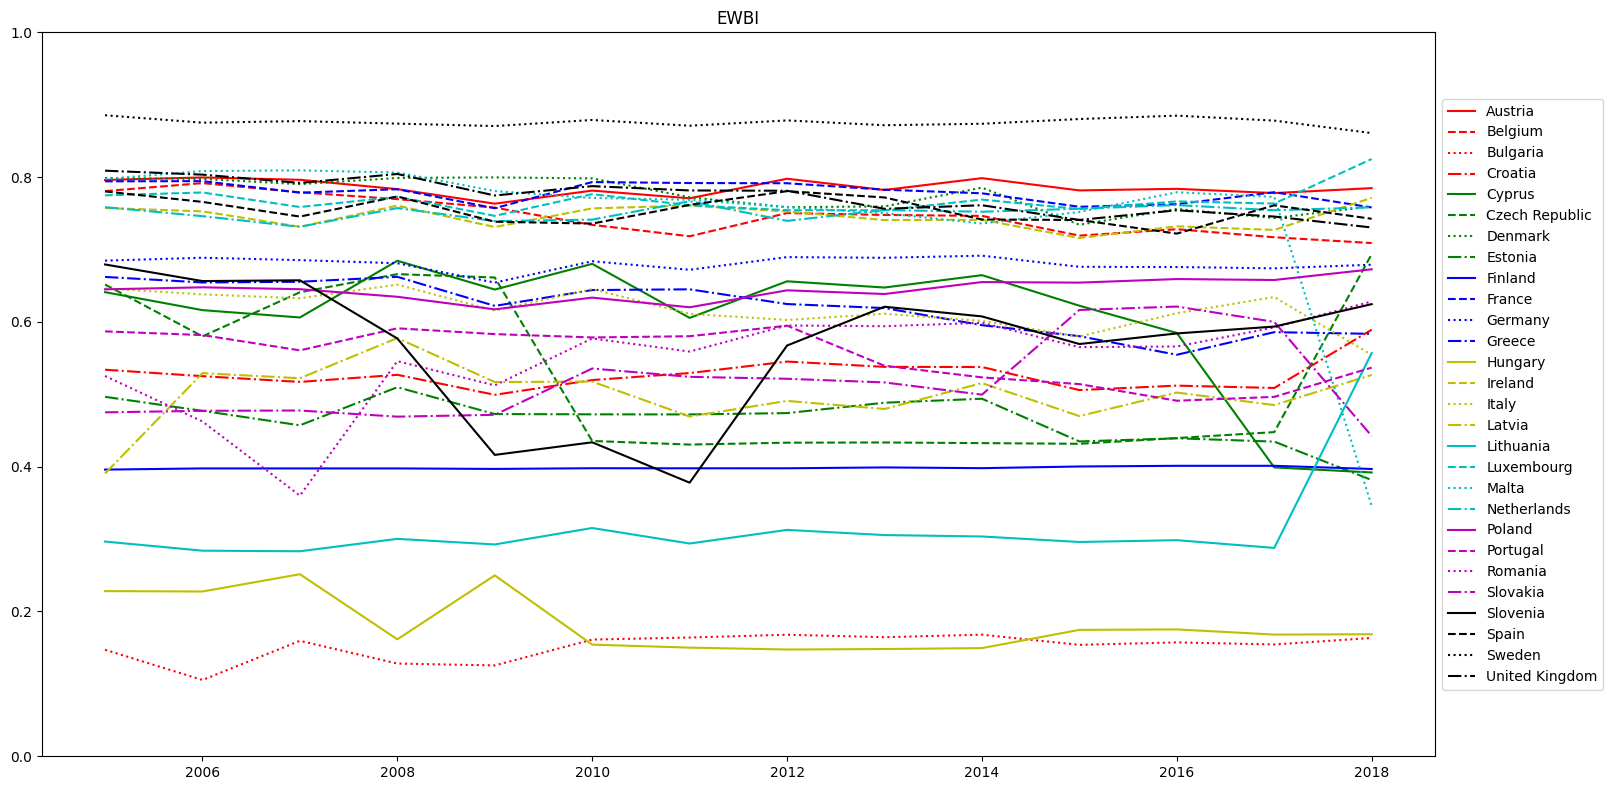

In [110]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_prop_cycle(mixed_cycler)
ewbi.loc[:, 2005:].transpose().plot(ax=ax, label='EWBI')
ax.set_ylim(0, 1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('EWBI')
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()
fig.savefig('ewbi_time.png')

In [169]:
fig = go.Figure()

default_visible = ['Sweden', 'France', 'Germany', 'Slovenia', 'Latvia', 'Bulgaria']
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
linestyle_cycle = ['solid', 'dash', 'dot', 'dashdot']

for i, country in enumerate(ewbi.index):
    fig.add_trace(
        go.Scatter(
            x=ewbi.columns,
            y=ewbi.loc[country],
            mode='lines',
            name=country,
            line=dict(width=3, color=color_cycle[i % len(color_cycle)], dash=linestyle_cycle[i % len(linestyle_cycle)]),
            visible=True if country in default_visible else 'legendonly',
            hoverinfo='text',
            hovertext=[f'{country}: {value:.2f}' for value in ewbi.loc[country]]
        )
    )

fig.update_layout(
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='EWBI',
        range=[0, 1],
        tickformat='.1f',
        gridwidth=0.2,
    ),
    showlegend=True,
    width=800,
    height=600,
    hoverlabel=dict(font_size=16)
)

fig.show()
fig.write_html('ewbi_time.html', include_plotlyjs=True, full_html=True)

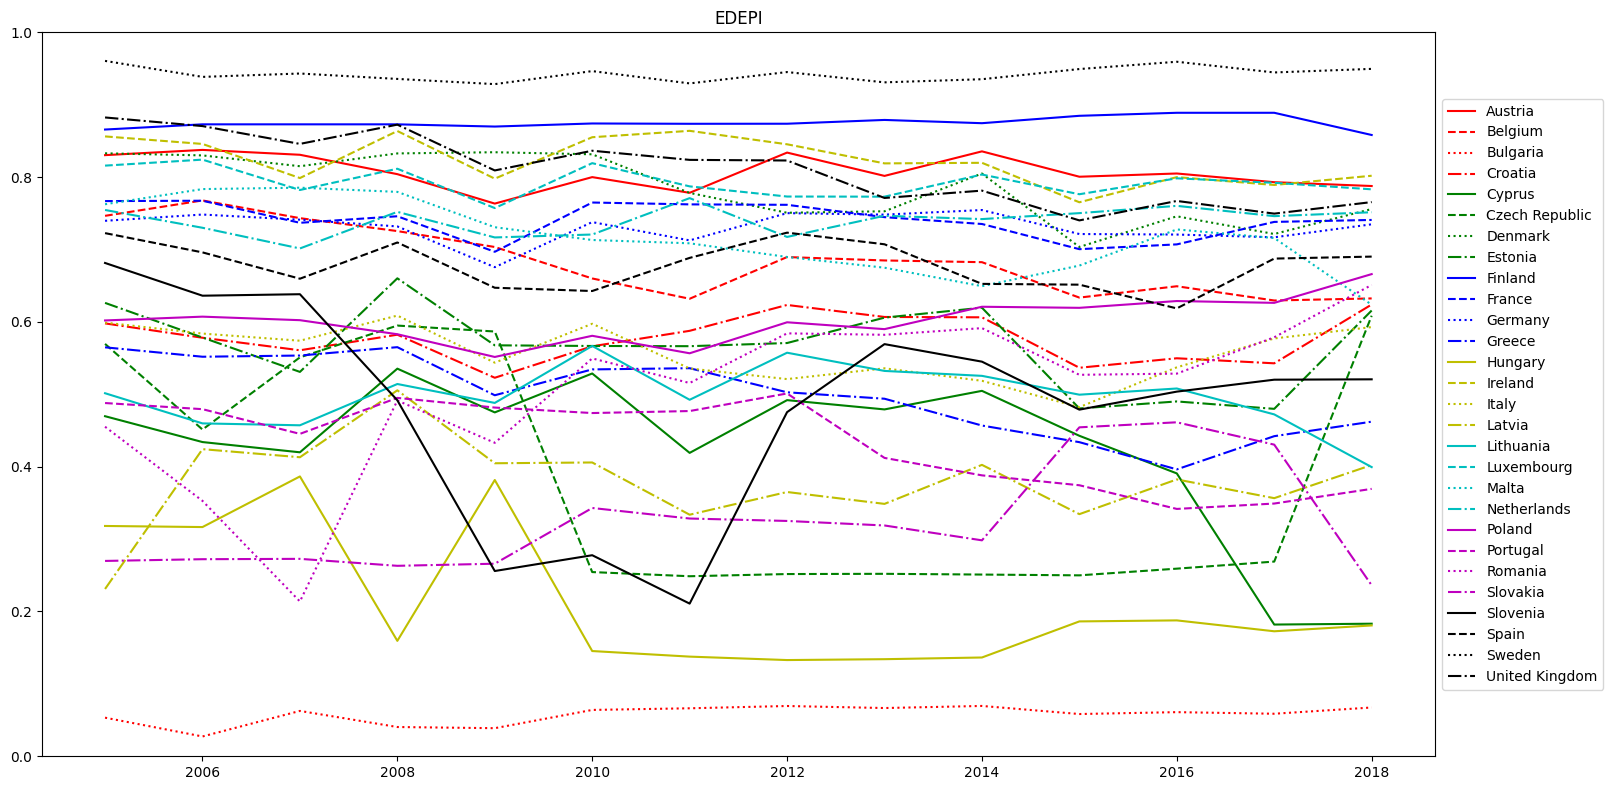

In [24]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_prop_cycle(mixed_cycler)
edepi.loc[:, 2005:].transpose().plot(ax=ax, label='EDEPI')
ax.set_ylim(0, 1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('EDEPI')
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()
fig.savefig('edepi_time.png')

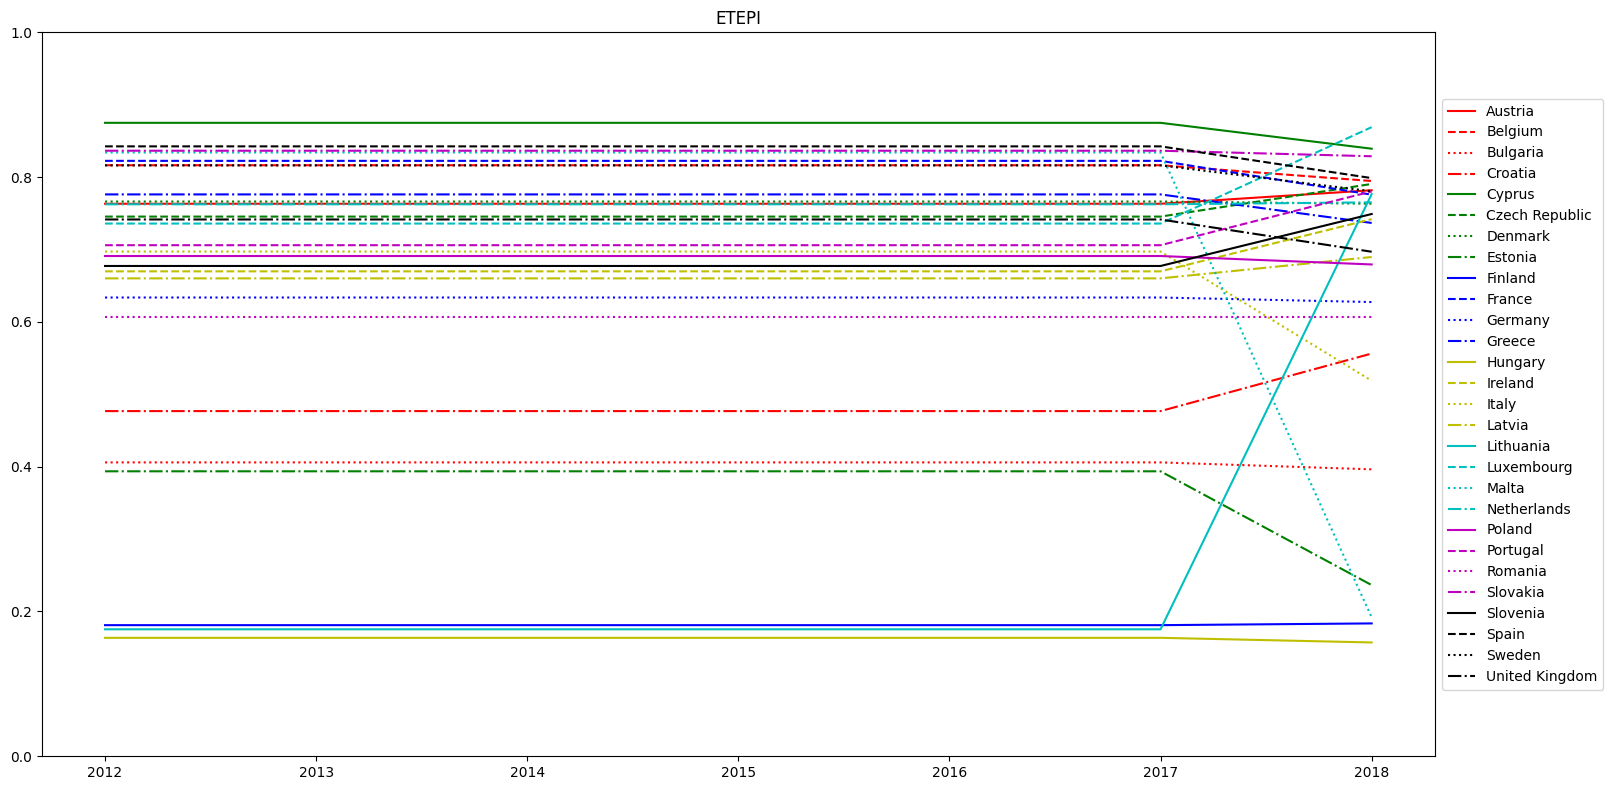

In [21]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_prop_cycle(mixed_cycler)
etepi.loc[:, 2012:].transpose().plot(ax=ax, label='ETEPI')
ax.set_ylim(0, 1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('ETEPI')
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()
fig.savefig('etepi_time.png')